In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
train_df

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,354912,19975.0,0.2565,801.09,RENT,28000.0,Not Verified,high_risk,n,...,100.0,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0,N,N
12176,354944,354944,15000.0,0.1774,540.34,RENT,50000.0,Verified,high_risk,n,...,90.5,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0,N,N
12177,354973,354973,3600.0,0.1862,131.28,RENT,60000.0,Not Verified,high_risk,n,...,100.0,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0,N,N
12178,355002,355002,15000.0,0.0881,475.68,MORTGAGE,62000.0,Source Verified,high_risk,n,...,100.0,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0,N,N


In [4]:
# Convert categorical data to numeric and separate target feature for training data
X_train = train_df.drop('loan_status', axis=1)
y_train = train_df['loan_status']
X_train

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,n,29.99,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,n,11.26,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,n,11.28,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,n,18.08,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,n,27.77,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,354912,19975.0,0.2565,801.09,RENT,28000.0,Not Verified,n,28.42,...,100.0,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0,N,N
12176,354944,354944,15000.0,0.1774,540.34,RENT,50000.0,Verified,n,23.43,...,90.5,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0,N,N
12177,354973,354973,3600.0,0.1862,131.28,RENT,60000.0,Not Verified,n,28.80,...,100.0,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0,N,N
12178,355002,355002,15000.0,0.0881,475.68,MORTGAGE,62000.0,Source Verified,n,11.44,...,100.0,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0,N,N


In [5]:
y_train

0         low_risk
1         low_risk
2         low_risk
3         low_risk
4         low_risk
           ...    
12175    high_risk
12176    high_risk
12177    high_risk
12178    high_risk
12179    high_risk
Name: loan_status, Length: 12180, dtype: object

In [6]:
X_train_dummies = pd.get_dummies(X_train, drop_first=True)

In [7]:
X_train_dummies

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,...,170200.0,1,0,0,0,0,1,0,0,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,...,35398.0,1,0,0,1,0,1,0,0,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,...,90340.0,1,0,0,1,0,1,0,0,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,...,15406.0,0,0,1,0,0,1,0,0,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,...,58778.0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,354912,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,...,19055.0,0,0,1,0,0,1,0,0,0
12176,354944,354944,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,...,54824.0,0,0,1,0,1,1,0,0,0
12177,354973,354973,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,...,53065.0,0,0,1,0,0,1,0,0,0
12178,355002,355002,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,...,32930.0,1,0,0,1,0,1,1,0,0


In [8]:
X_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 87 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           12180 non-null  int64  
 1   index                                12180 non-null  int64  
 2   loan_amnt                            12180 non-null  float64
 3   int_rate                             12180 non-null  float64
 4   installment                          12180 non-null  float64
 5   annual_inc                           12180 non-null  float64
 6   dti                                  12180 non-null  float64
 7   delinq_2yrs                          12180 non-null  float64
 8   inq_last_6mths                       12180 non-null  float64
 9   open_acc                             12180 non-null  float64
 10  pub_rec                              12180 non-null  float64
 11  revol_bal                   

In [9]:
# Convert categorical data to numeric and separate target feature for testing data

X_test = test_df.drop('loan_status', axis =1)
y_test = test_df['loan_status']

In [10]:
X_test

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,n,19.75,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,n,11.52,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,n,6.74,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,n,12.13,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,n,16.08,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,RENT,140480.0,Source Verified,n,15.74,...,100.0,28.6,0.0,0.0,159688.0,110873.0,48400.0,107388.0,N,N
4698,77291,77291,24000.0,0.0756,747.22,RENT,50000.0,Not Verified,n,26.81,...,100.0,0.0,0.0,0.0,62375.0,18928.0,13300.0,30775.0,N,N
4699,77292,77292,10000.0,0.2305,387.36,RENT,33000.0,Verified,n,38.51,...,100.0,0.0,0.0,0.0,43250.0,33022.0,8500.0,29550.0,N,N
4700,77297,77297,8000.0,0.1862,205.86,RENT,38000.0,Source Verified,n,16.36,...,95.0,0.0,1.0,0.0,31357.0,19595.0,1500.0,9657.0,N,N


In [11]:
y_test

0        low_risk
1        low_risk
2        low_risk
3        low_risk
4        low_risk
          ...    
4697    high_risk
4698    high_risk
4699    high_risk
4700    high_risk
4701    high_risk
Name: loan_status, Length: 4702, dtype: object

In [12]:
X_test_dummies = pd.get_dummies(X_test, drop_first=True)

In [13]:
X_test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 86 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           4702 non-null   int64  
 1   index                                4702 non-null   int64  
 2   loan_amnt                            4702 non-null   float64
 3   int_rate                             4702 non-null   float64
 4   installment                          4702 non-null   float64
 5   annual_inc                           4702 non-null   float64
 6   dti                                  4702 non-null   float64
 7   delinq_2yrs                          4702 non-null   float64
 8   inq_last_6mths                       4702 non-null   float64
 9   open_acc                             4702 non-null   float64
 10  pub_rec                              4702 non-null   float64
 11  revol_bal                     

In [14]:
X_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 87 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           12180 non-null  int64  
 1   index                                12180 non-null  int64  
 2   loan_amnt                            12180 non-null  float64
 3   int_rate                             12180 non-null  float64
 4   installment                          12180 non-null  float64
 5   annual_inc                           12180 non-null  float64
 6   dti                                  12180 non-null  float64
 7   delinq_2yrs                          12180 non-null  float64
 8   inq_last_6mths                       12180 non-null  float64
 9   open_acc                             12180 non-null  float64
 10  pub_rec                              12180 non-null  float64
 11  revol_bal                   

In [15]:
# add missing dummy variables to testing set
X_test_dummies['debt_settlement_flag_Y']=0
from sklearn.model_selection import train_test_split

In [16]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [17]:
classifier.fit(X_train_dummies, y_train)

/Users/alexanderlorin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
print(f"Training Data Score: {classifier.score(X_train_dummies, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_dummies, y_test)}")

Training Data Score: 0.6499178981937602
Testing Data Score: 0.5204168438962143


In [36]:
### I think that random forest will return better result since it can handle non-linear data and noise better than logistic regression.

In [19]:
# Train a Random Forest Classifier model and print the model score


In [20]:
# Scale the data
scaler = StandardScaler().fit(X_train_dummies)

In [21]:
X_train_scaled = scaler.transform(X_train_dummies)
X_test_scaled = scaler.transform(X_test_dummies)

In [22]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier = LogisticRegression()
classifier

LogisticRegression()

In [23]:
classifier.fit(X_train_scaled, y_train)

/Users/alexanderlorin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.713136288998358
Testing Data Score: 0.7233092301148447


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Train a Random Forest Classifier model on the scaled data and print the model scoreclf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6335601871544024


In [ ]:
### The logistic regression performed poorly, but once the data was scaled, the accuracy improved and returned better result than random forest

In [27]:
from matplotlib import pyplot as plt

[4.07813213e-02 4.08154224e-02 1.65068792e-02 3.14936543e-02
 3.21780308e-02 1.29374306e-02 1.41663354e-02 2.60373504e-03
 3.64324165e-03 7.91006432e-03 1.29795363e-03 1.36150723e-02
 1.04075449e-02 3.13393582e-02 3.14270086e-02 4.09416778e-02
 3.99819914e-02 5.48160741e-02 3.86257717e-02 1.55085916e-02
 0.00000000e+00 0.00000000e+00 9.08219350e-02 6.65965577e-04
 0.00000000e+00 6.13141610e-06 4.11573070e-03 1.21377636e-02
 4.24966077e-03 5.89250208e-03 3.62169193e-03 5.42137515e-03
 1.06307147e-02 1.19840487e-02 1.24509536e-02 4.45423349e-03
 6.66831976e-03 1.52528053e-02 1.15545192e-02 1.40116951e-02
 5.65830805e-03 5.88971877e-03 7.08655345e-03 8.55891247e-03
 1.29626460e-02 1.40301986e-02 1.28861519e-02 2.40681041e-04
 1.24461954e-06 1.44940078e-02 1.51791923e-02 1.08084216e-02
 9.05162183e-03 5.05169744e-03 1.23033862e-02 1.05859355e-02
 3.08578321e-03 6.07582173e-03 7.13902555e-03 6.45880672e-03
 8.16249077e-03 9.70829287e-03 7.67766184e-03 8.96632941e-03
 7.02621444e-03 7.769092

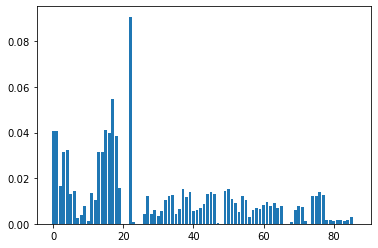

In [28]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [ ]:
#trying feature selections to see the difference

In [29]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False])

In [31]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_train_scaled), y_train, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [32]:
classifier.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {classifier.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {classifier.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7037766830870279
Testing Score: 0.7083743842364532


In [34]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8151067323481117
